<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Discussion_of_further_5x3_Slot_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: David K.L. Hui

This project will discuss further design of 5x3 slot game, multiple paylines, ways, with the aid of simulations



<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1_pEbq7z_FYtHwGqdorIiSfBgUY3HFupN' width='400'/>
<figcaption>Disclaimer: I do not own these images, I capture this from Google Images</figcaption></center>
</figure>

# Section 1: Introduction

## 1.1: Background

Previous projects we have discussed basic 3x3 and 5x3 slot design. This project will discuss about further common design in casino, archade, and iGaming producer.

In this project, we will discuss another 5x3 slot machine with multiple paylines with wild symbol.




## 1.2: Objective

This project will generalize the previous programming code to satisfy a more general configurations:
1. the 5x3 slot design
2. each reel has 7 symbols: one simply nothing (not contribute to any winning combination); five for wins if matched pattern; and one for wild symbol (substitution for any symbol)
3. payout definition to satisfy predefined paylines
4. perform simulations to estimate the probability of wins and determine the payouts



## 1.3: Configurations

In this project, we will discuss the game design with the following game configurations:

1. 5 reels with 3 rows
2. each reel have 7 symbols:
    Surely no payout: 👻 \\
    Have payout if matched pattern: 🧀, 🍎, 🍋, 🥝, 🍕 \\
    Wild symbol (as a substitution for any 1 symbol, but at most one time): 🧩



# Section 2: Programming

We will use some codes we defined before.

## 2.1: Import related libraries

In [ ]:
# import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import typing


np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

## 2.2: Symbol Class

In [ ]:
# define Symbol class, allow to not supplying probability, default to 0
class Symbol():
  def __init__(self, key, symbol, prob=0):
    if(prob < 0 or prob > 1):
      raise Exception(f"probability must be within [0,1], received {symbol} has prob={prob}")

    self.key = key
    self.symbol = symbol
    self.prob = prob

  def __repr__(self):
    return self.symbol


In [ ]:
# Instantiate symbols
# this time, non-positive keys for no payout
# 100 for wild symbol
# positive key has payout if pattern matched
ghost = Symbol(0, '👻')

apple = Symbol(1, '🍎')
lemon = Symbol(2, '🍋')
kiwi = Symbol(3, '🥝')
pizza = Symbol(4, '🍕')
cheese = Symbol(5, '🧀')


wild = Symbol(100, '🧩')

## 2.3: Payout (Payline) Function

In [ ]:

payout_payline_definition = {
    # for all are the same
    # 0 payout is not necessary to put in
    "all": [
        {"id": 1, "key": 1, "exact": 500, "wild": 250},
        {"id": 2, "key": 2, "exact": 500, "wild": 250},
        {"id": 3, "key": 3, "exact": 1000, "wild": 500},
        {"id": 4, "key": 4, "exact": 1000, "wild": 500},
        {"id": 5, "key": 5, "exact": 2000, "wild": 1000},
    ],
    # further combinations
    "extra": [
        {"id": 6, "keys": [1,2,3,4,5], "exact": 10, "wild": 5},
        {"id": 7, "keys": [4,4,4,5,5], "exact": 20, "wild": 5}, # [0,4,4,4,5], [0,4,4,5,5] are also matched, but should only count once

    ]
}


def payout_single_line(symbols, payout_payline_definition):
  if len(symbols)!=5:
    raise Exception(f"must provide a list of symbols of length 5 (because 5 reels), given={len(symbols)}")

  keys = [symbol.key for symbol in symbols]
  keys = sorted(keys)
  exact_match = payout_single_line_without_wild(keys, payout_payline_definition)

  if exact_match is not None:
    return {"id": exact_match["id"], "payout": exact_match["exact"], "keys": exact_match["keys"], "matched": "exact"}
  else:
    wild_matched_list = payout_single_line_with_wild(keys, payout_payline_definition)
    if len(wild_matched_list) > 0:
      wild_matched = np.array(wild_matched_list)
      max_value = max([item["wild"] for item in wild_matched])
      wild_match =  [item for item in wild_matched if item['wild']==max_value][0]
      return {"id": wild_match["id"], "payout": wild_match["wild"], "keys": wild_match["keys"], "matched": "wild"}
    else:
      return None



def payout_single_line_without_wild(keys: typing.List[int], payout_payline_definition):

  key_counts = Counter(keys)
  # print(f"keys={keys}")

  # check if same keys, if so, check the first key
  if(sorted(list(key_counts.values())) == [len(keys)]):
    the_key = keys[0]
    for item in payout_payline_definition['all']:
      if item['key'] == the_key:
        item['keys'] = np.repeat(the_key, 5).tolist()
        return item

  # check for further combinations:
  else:
    for item in payout_payline_definition["extra"]:
      check_keys = sorted(item["keys"])
      if check_keys == sorted(keys):
        return item

  # default
  return None




def payout_single_line_with_wild(keys: typing.List[int], payout_payline_definition):

  key_counts = Counter(keys)

  matched = []

  if key_counts[100] == 1:
    # check all keys that "may" eligible for payout
    for replace_key in [1,2,3,4,5]:
      replaced_keys = np.array(keys)
      replaced_keys = np.select([replaced_keys == 100], [replace_key], replaced_keys)

      result = payout_single_line_without_wild(replaced_keys, payout_payline_definition)
      if result is not None:
        matched.append(result)

  return matched


In [ ]:
# no payout
print(f"no payout: {payout_single_line([apple, apple, lemon, pizza, cheese], payout_payline_definition)}")

# all apple
print(f"all apple, get payout: {payout_single_line([apple, apple, apple, apple, apple], payout_payline_definition)}")

# all lemon
print(f"all lemon, get payout: {payout_single_line([lemon, lemon, lemon, lemon, lemon], payout_payline_definition)}")

# all kiwi
print(f"all kiwi, get payout: {payout_single_line([kiwi, kiwi, kiwi, kiwi, kiwi], payout_payline_definition)}")

# all pizza
print(f"all pizza, get payout: {payout_single_line([pizza, pizza, pizza, pizza, pizza], payout_payline_definition)}")

# all cheese
print(f"all cheese, get payout: {payout_single_line([cheese, cheese, cheese, cheese, cheese], payout_payline_definition)}")

# all ghost
print(f"all ghost, no payout: {payout_single_line([ghost, ghost, ghost, ghost, ghost], payout_payline_definition)}")

# some ghost
print(f"some ghost, no payout: {payout_single_line([ghost, cheese, cheese, cheese, wild], payout_payline_definition)}")

# special pattern
print(f"special pattern (apple,lemon,kiwi,pizza,cheese), get payout: {payout_single_line([apple, lemon, kiwi, pizza, cheese], payout_payline_definition)}")

# special pattern
print(f"special pattern (lemon,wild,kiwi,pizza,cheese), get payout (wild): {payout_single_line([lemon, wild, kiwi, pizza, cheese], payout_payline_definition)}")

# special pattern
print(f"special pattern (pizza,pizza,pizza,cheese,cheese), get payout: {payout_single_line([pizza, cheese, pizza, pizza, cheese], payout_payline_definition)}")

# special pattern
print(f"special pattern (pizza,pizza,cheese,cheese,cheese), no payout: {payout_single_line([pizza, cheese, cheese, pizza, cheese], payout_payline_definition)}")

# special pattern
print(f"special pattern (pizza,pizza,wild,cheese,cheese), no payout: {payout_single_line([pizza, pizza, wild, cheese, cheese], payout_payline_definition)}")



no payout: None
all apple, get payout: {'id': 1, 'payout': 500, 'keys': [1, 1, 1, 1, 1], 'matched': 'exact'}
all lemon, get payout: {'id': 2, 'payout': 500, 'keys': [2, 2, 2, 2, 2], 'matched': 'exact'}
all kiwi, get payout: {'id': 3, 'payout': 1000, 'keys': [3, 3, 3, 3, 3], 'matched': 'exact'}
all pizza, get payout: {'id': 4, 'payout': 1000, 'keys': [4, 4, 4, 4, 4], 'matched': 'exact'}
all cheese, get payout: {'id': 5, 'payout': 2000, 'keys': [5, 5, 5, 5, 5], 'matched': 'exact'}
all ghost, no payout: None
some ghost, no payout: None
special pattern (apple,lemon,kiwi,pizza,cheese), get payout: {'id': 6, 'payout': 10, 'keys': [1, 2, 3, 4, 5], 'matched': 'exact'}
special pattern (lemon,wild,kiwi,pizza,cheese), get payout (wild): {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild'}
special pattern (pizza,pizza,pizza,cheese,cheese), get payout: {'id': 7, 'payout': 20, 'keys': [4, 4, 4, 5, 5], 'matched': 'exact'}
special pattern (pizza,pizza,cheese,cheese,cheese), no payout: No

In [ ]:

# to generalize the payout calculation, now considering the whole window
# defined only 11 paylines
# unlike before, change the "rows" to "window", be the list of reels output
def payout_paylines(window, payout_payline_definition):
  if len(window) != 5:
    raise Exception(f"must provide 5 reels, each of size 3, given window size: {len(window)}")
  for row_id in range(len(window)):
    if len(window[row_id]) != 3:
      raise Exception(f"each reel must provide 3 rows, at row id {row_id}, size: {len(window[row_id])}")

  # use numpy array is easier
  window = np.array(window)

  # A A A A A
  # - - - - -
  # - - - - -
  horizontal_payline_1 = payout_single_line(window[:,0], payout_payline_definition)
  if horizontal_payline_1 is not None:
    horizontal_payline_1["pattern"] = "h1" #horizontal_payline_1

  # - - - - -
  # A A A A A
  # - - - - -
  horizontal_payline_2 = payout_single_line(window[:,1], payout_payline_definition)
  if horizontal_payline_2 is not None:
    horizontal_payline_2["pattern"] = "h2" #horizontal_payline_2

  # - - - - -
  # - - - - -
  # A A A A A
  horizontal_payline_3 = payout_single_line(window[:,2], payout_payline_definition)
  if horizontal_payline_3 is not None:
    horizontal_payline_3["pattern"] = "h3" #horizontal_payline_3

  # A - - - A
  # - A - A -
  # - - A - -
  v_payline = payout_single_line([window[0,0], window[1,1], window[2,2], window[3,1], window[4,0]], payout_payline_definition)
  if v_payline is not None:
    v_payline["pattern"] = "v1" #v_payline

  # - - A - -
  # - A - A -
  # A - - - A
  v_inverted_payline = payout_single_line([window[0,2], window[1,1], window[2,0], window[3,1], window[4,2]], payout_payline_definition)
  if v_inverted_payline is not None:
    v_inverted_payline["pattern"] = "iv1" #v_inverted_payline

  # A - A - A
  # - A - A -
  # - - - - -
  w_payline_1 = payout_single_line([window[0,0], window[1,1], window[2,0], window[3,1], window[4,0]], payout_payline_definition)
  if w_payline_1 is not None:
    w_payline_1["pattern"] = "w1" #w_payline_1

  # - - - - -
  # A - A - A
  # - A - A -
  w_payline_2 = payout_single_line([window[0,1], window[1,2], window[2,1], window[3,2], window[4,1]], payout_payline_definition)
  if w_payline_2 is not None:
    w_payline_2["pattern"] = "w2" #w_payline_2

  # A - A - A
  # - - - - -
  # - A - A -
  w_payline_3 = payout_single_line([window[0,0], window[1,2], window[2,0], window[3,2], window[4,0]], payout_payline_definition)
  if w_payline_3 is not None:
    w_payline_3["pattern"] = "w3" #w_payline_3

  # - A - A -
  # A - A - A
  # - - - - -
  m_payline_1 = payout_single_line([window[0,1], window[1,0], window[2,1], window[3,0], window[4,1]], payout_payline_definition)
  if m_payline_1 is not None:
    m_payline_1["pattern"] = "m1" #m_payline_1

  # - - - - -
  # - A - A -
  # A - A - A
  m_payline_2 = payout_single_line([window[0,2], window[1,1], window[2,2], window[3,1], window[4,2]], payout_payline_definition)
  if m_payline_2 is not None:
    m_payline_2["pattern"] = "m2" #m_payline_2

  # - A - A -
  # - - - - -
  # A - A - A
  m_payline_3 = payout_single_line([window[0,2], window[1,0], window[2,2], window[3,0], window[4,2]], payout_payline_definition)
  if m_payline_3 is not None:
    m_payline_3["pattern"] = "m3" #m_payline_3



  matched = [horizontal_payline_1, horizontal_payline_2, horizontal_payline_3, v_payline, v_inverted_payline,
             w_payline_1, w_payline_2, w_payline_3, m_payline_1, m_payline_2, m_payline_3]
  matched = list(filter(lambda x: x is not None, matched))


  return matched

## 2.4: Reel Class

In [ ]:
# define a reel, which can provide the probability of apple, lemon, and kiwi
# so for the N-reels slot design, we can have different set of probabilities of symbols
# to generalize this, it should directly accept any symbols, but probability must sum up to 1
class Reel():
  def __init__(self, symbols: typing.List[Symbol]):
    self.symbols = symbols

    ## basic checks for the validity of inputs

    key_list = [x.key for x in self.symbols]
    check_keys, keys_count = np.unique(key_list, return_counts=True)
    if not all(keys_count==1):
      raise Exception(f"Key set are not all distinct, given: {key_list}, duplicated items: {[a[0] for a in zip(check_keys, keys_count) if a[1] > 1]}")

    symbol_list = [x.symbol for x in symbols]
    check_symbols, symbols_count = np.unique(symbol_list, return_counts=True)
    if not all(symbols_count==1):
      raise Exception(f"Symbol set are not all distinct, given: {symbol_list}, duplicated: {[a[0] for a in zip(check_symbols, symbols_count) if a[1] > 1]}")

    total_prob = sum([x.prob for x in symbols])
    if total_prob < 0:
      raise Exception(f"Prob isn't sum up to 1: total prob={total_prob}")
    if total_prob > 1:
      if np.abs(total_prob - 1) < 1e-6:
        # simply update any one of the symbol because the diff is extremely small
        any_one_symbol = self.symbols[np.random.choice(a = range(len(symbols)))]
        any_one_symbol.prob = any_one_symbol.prob - np.abs(total_prob - 1)
      else:
        raise Exception(f"Prob isn't sum up to 1: total prob={total_prob}")



  def probs(self):
    return [x.prob for x in self.symbols]

  def spin(self, size):
    return np.random.choice(a=self.symbols, size=size, p=self.probs(), replace=True)




## 2.5: Slot Class

In [ ]:
# define the slot game which aceept N reels
# the spin accept size parameter, which is also changable to any reasonabl value like 3 or 5
class SlotPrototype():
  def __init__(self, cost, reels: typing.List[Reel], rows: int):
    self.cost = cost
    self.reels = reels
    self.rows = rows

  # this function changed, no longer use np.transpose (because last time for demostration purpose)
  def spin(self):
    return [self.reels[i].spin(self.rows) for i in range(len(self.reels))]

  # pre-define the payout function here for later inheritance and implement
  def payout(self):
    pass



In [ ]:
class SlotV1(SlotPrototype):

  def __init__(self, cost,
               reels: typing.List[Reel], rows: int,
               payout_payline_definition,
               payout_paylines_fn):
    super().__init__(cost, reels, rows)
    self.payout_payline_definition = payout_payline_definition
    self.payout_paylines_fn = payout_paylines_fn

  def spin(self, display=False):
    results = super().spin();
    if display:
      print(np.transpose(np.c_[results]))

    return self.payout(results)

  def payout(self, results: typing.List[typing.List[Symbol]]):
    return self.payout_paylines_fn(results, payout_payline_definition)



In [ ]:
# Example


# randomly set the probabilities, they are not important in this stage, but we will adjust them later
reel1 = Reel([Symbol(4, '🧀', 0.1), Symbol(1, '🍎', 0.7), Symbol(2, '🍋', 0.1), Symbol(3, '🥝', 0.1)])
reel2 = Reel([Symbol(4, '🧀', 0.1), Symbol(1, '🍎', 0.3), Symbol(2, '🍋', 0.3), Symbol(3, '🥝', 0.3)])
reel3 = Reel([Symbol(4, '🧀', 0.25), Symbol(1, '🍎', 0.25), Symbol(2, '🍋', 0.25), Symbol(3, '🥝', 0.25)])
reel4 = Reel([Symbol(4, '🧀', 0.15), Symbol(1, '🍎', 0.55), Symbol(2, '🍋', 0.15), Symbol(3, '🥝', 0.15)])
reel5 = Reel([Symbol(4, '🧀', 0.01), Symbol(1, '🍎', 0.97), Symbol(2, '🍋', 0.01), Symbol(3, '🥝', 0.01)])

# for easier checking, set the spin size be larger (say 10), so we should expect there are 10 rows x 5 columns (5 reels)
# for this example, reel 1 should have many apples; reel 5 should have mostly cheeses
slotV1 = SlotV1(cost=10, reels=[reel1, reel2, reel3, reel4, reel5], rows=3,
              payout_payline_definition=payout_payline_definition,
              payout_paylines_fn=payout_paylines)




In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🍎 🥝 🥝 🥝 🍎]
 [🍎 🍋 🍋 🧀 🍎]
 [🍎 🥝 🍎 🍎 🍎]]


[]

In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🥝 🍎 🍎 🍎 🍎]
 [🍎 🧀 🧀 🍎 🍎]
 [🍎 🍎 🍎 🍋 🍎]]


[{'id': 1,
  'payout': 500,
  'keys': [1, 1, 1, 1, 1],
  'matched': 'exact',
  'pattern': 'm3'}]

In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🍎 🥝 🍋 🍎 🍎]
 [🍎 🍎 🧀 🧀 🍎]
 [🧀 🥝 🍋 🥝 🍎]]


[]

In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🍎 🧀 🧀 🧀 🍎]
 [🍎 🥝 🧀 🧀 🍎]
 [🍎 🍋 🥝 🍋 🍎]]


[]

In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🍎 🥝 🧀 🍎 🍎]
 [🍎 🍎 🍎 🍎 🍋]
 [🍎 🥝 🍎 🍎 🍎]]


[{'id': 1,
  'payout': 500,
  'keys': [1, 1, 1, 1, 1],
  'matched': 'exact',
  'pattern': 'v1'},
 {'id': 1,
  'payout': 500,
  'keys': [1, 1, 1, 1, 1],
  'matched': 'exact',
  'pattern': 'm2'}]

In [ ]:
spin_test = slotV1.spin(display=True)
spin_test

[[🍎 🥝 🥝 🧀 🍎]
 [🍎 🥝 🧀 🍎 🍎]
 [🍎 🍋 🍋 🍋 🍎]]


[]

# Section 3: Simulation

Like previous projects, next we will discuss how to simulate the slot mechanism spin results. Depending on the metrics we used (like Return-To-Play percentage, Hit Frequency percentage, Volatility, or further gambler's behavior), we will try to find a good distribution of symbols per reel.

Again, we assume the payout value are fixed. However, the payout value can be optimized under our discussion in Spin-Poker project

## 3.1: Programming for Simulation

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
import itertools
import numpy as np
import time
import math
import pandas as pd

from concurrent.futures import ProcessPoolExecutor
import os
import multiprocessing



class SlotV1Sim():

  def __init__(self, sim_size, sim_size_for_probs, cost, probs=None):
    self.sim_size = sim_size
    self.sim_size_for_probs = sim_size_for_probs
    self.cost = cost
    self.probs = probs

  def sim(self):


    num_batches = multiprocessing.cpu_count() * 8
    batch_size = math.floor(self.sim_size / num_batches)

    if batch_size == 0:
      num_batches = multiprocessing.cpu_count()
      batch_size = math.floor(self.sim_size / num_batches)

    if batch_size == 0:
      num_batches = 1
      batch_size = self.sim_size

    print(f"sim_size={self.sim_size}, num_batches = {num_batches}, batch_size={batch_size}")
    with ProcessPoolExecutor() as executor:
      results = []

      futures = [executor.submit(self.parallel_sim, batch_index, batch_size) for batch_index in range(num_batches)]

      for future in futures:
        results.extend(future.result())

      self.results = results


  def parallel_sim(self, batch_index, batch_size):
    seed = np.random.RandomState().randint(0,os.getpid(),size=1)
    np.random.seed(seed)

    # print(f"===> Batch: {batch_index}/{batch_size}")

    results = []
    for j in range(batch_size):
      # if j % 10 == 0:
      st = time.time()

      results.append(self.SlotSimInternal(self.sim_size_for_probs, self.cost, self.probs))
      print(f"===> Batch {batch_index}: running iteration {j}/{batch_size}, taken time={time.time() - st} seconds")

    return results
    # return [self.SlotSimInternal(self.sim_size_for_probs, self.cost) for j in range(batch_size)]



  class SlotSimInternal():
    def __init__(self, sim_size_for_probs, cost, probs=None):
      num_rows = 3
      num_reels = 5
      num_symbols = 7

      if probs is None:
        dirichlet = np.random.dirichlet(np.ones(num_symbols), size=num_reels)
      else:
        dirichlet = probs


      reels = [self.construct_reel(item) for item in dirichlet]

      slot = SlotV1(cost=cost,
               reels=reels, rows=num_rows,
               payout_payline_definition=payout_payline_definition,
               payout_paylines_fn=payout_paylines)

      self.sim_size_for_probs = sim_size_for_probs
      self.cost = cost
      self.dirichlet = dirichlet
      self.reels = reels
      self.slot = slot

      self.outcomes = self.train()
#      print(f"outcomes: {self.outcomes}")
      self.payouts = [sum([y['payout'] for y in x]) for x in self.outcomes]
      self.RTP = self.calculate_RTP()
      self.HF = self.calculate_HF()

    def construct_reel(self, probs):
#      print(probs)
      ghost = Symbol(0, '👻', probs[0])
      apple = Symbol(1, '🍎', probs[1])
      lemon = Symbol(2, '🍋', probs[2])
      kiwi = Symbol(3, '🥝', probs[3])
      pizza = Symbol(4, '🍕', probs[4])
      cheese = Symbol(5, '🧀', probs[5])
      wild = Symbol(100, '🧩', probs[6])

      return Reel(symbols=[ghost, apple, lemon, kiwi, pizza, cheese, wild])

    def train(self):

      return [self.slot.spin() for k in range(self.sim_size_for_probs)]


    def calculate_RTP(self):
      expected_payout = np.mean(self.payouts)
#      print(f"expected payout={expected_payout}")
      self.expected_payout = expected_payout
      self.expected_gain = expected_payout - self.cost
#      print(f"expected gain={self.expected_gain}")
      return expected_payout / 10 * 100



    def calculate_HF(self):

      hit_count = np.sum(np.array(self.payouts) > 0)
      hit_freq = hit_count / len(self.payouts)

      self.hit_count = hit_count
      return hit_freq * 100




In [ ]:
#N = 500
#M = int(np.round(10000 / multiprocessing.cpu_count(), -2))
N=10000
#N = multiprocessing.cpu_count()
M=100*20

print(f"N={N}, M={M}, N*M = {N*M}")
print(time.strftime("%H:%M:%S", time.localtime()))
x = SlotV1Sim(N, M, 10)

start_time = time.time()

x.sim()
# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

print(f"Overall Execution Time: {execution_time} seconds")


# save the data for later session to use

import pickle

from google.colab import drive
#drive.mount('/content/drive')
file_path = f'/content/drive/MyDrive/data_N{N}_M{M}_{int(time.time())}.pkl'


with open(file_path, 'wb') as file:
    pickle.dump(x, file)


N=10000, M=2000, N*M = 20000000
08:46:42
sim_size=10000, num_batches = 96, batch_size=104
===> Batch 3: running iteration 0/104, taken time=4.436938762664795 seconds
===> Batch 9: running iteration 0/104, taken time=4.601486444473267 seconds
===> Batch 8: running iteration 0/104, taken time=5.12030553817749 seconds
===> Batch 10: running iteration 0/104, taken time=5.289063930511475 seconds
===> Batch 5: running iteration 0/104, taken time=5.70197057723999 seconds
===> Batch 2: running iteration 0/104, taken time=5.896420240402222 seconds
===> Batch 0: running iteration 0/104, taken time=6.092151641845703 seconds
===> Batch 11: running iteration 0/104, taken time=6.194289445877075 seconds
===> Batch 4: running iteration 0/104, taken time=6.313230037689209 seconds===> Batch 1: running iteration 0/104, taken time=6.3320934772491455 seconds

===> Batch 7: running iteration 0/104, taken time=6.530662775039673 seconds
===> Batch 6: running iteration 0/104, taken time=6.714591026306152 secon

KeyboardInterrupt: 

## 3.2: Simulation Results

In [ ]:
import pickle

with open("/content/drive/MyDrive/data_N10000_M2000_1719177370.pkl", "rb") as input_file:
  x = pickle.load(input_file)

In [ ]:
df = pd.DataFrame(columns=["i", "RTP", "HF"])
for i in range(len(x.results)):
  df.loc[i] = [i, x.results[i].RTP, x.results[i].HF]

df = df.astype({'i': int})


In [ ]:
df

,i,RTP,HF
0,0,100.950,35.85
1,1,139.775,43.35
2,2,63.000,41.05
3,3,211.050,33.45
4,4,214.800,47.65
...,...,...,...
9979,9979,100.275,23.20
9980,9980,122.775,32.45
9981,9981,115.925,28.65
9982,9982,55.375,27.00


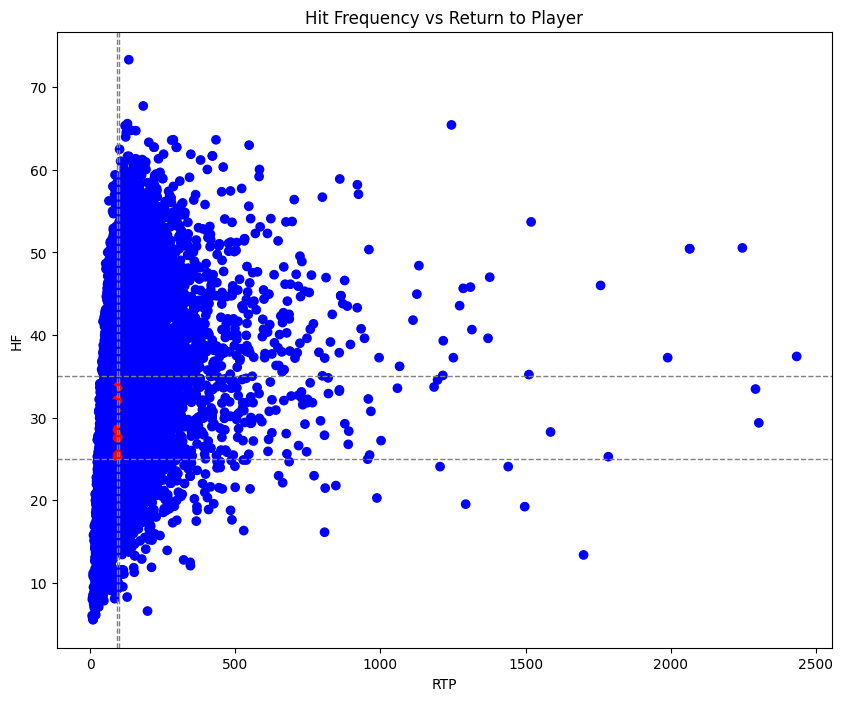

In [ ]:
# because there are only a few solutions for RTP within [95,97], so I widen it a bit
v1 = 93
v2 = 99
h1 = 25
h2 = 35

cond = (df['RTP']>=v1) & (df['RTP'] <= v2) & (df['HF']>=h1) & (df['HF'] <= h2)

plt.figure(figsize=(10,8))

plt.scatter(df['RTP'], df['HF'], c=np.where(cond, 'red', 'blue'), marker='o')
plt.xlabel('RTP')
plt.ylabel('HF')

#plt.xlim(0, 200)

plt.axvline(x=v1, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=v2, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h1, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h2, color='gray', linestyle='--', linewidth=1)

plt.title("Hit Frequency vs Return to Player")

plt.show()

In [ ]:
# see the matched case
df[cond]

,i,RTP,HF
7,7,98.725,30.90
22,22,98.050,29.85
23,23,97.500,34.75
44,44,93.350,34.40
96,96,98.575,34.00
...,...,...,...
9714,9714,93.525,25.25
9772,9772,94.150,32.10
9835,9835,94.650,28.55
9902,9902,95.250,33.70


## 3.3: Analyse the satisfied result

In [ ]:
# suppose we narrowed down to only accept HF within [29,31]
cond_HF = (df['HF']>=29) & (df['HF'] <= 31)


satisfied_result = x.results[df[cond_HF].iloc[0, 0]]
satisfied_result.RTP, satisfied_result.HF


(104.94999999999999, 29.4)

In [ ]:
# see the probability distribution for each reel

satisfied_result.dirichlet

array([[0.08673483, 0.11720108, 0.22592343, 0.10113501, 0.351472  , 0.03518056, 0.0823531 ],
       [0.30914872, 0.11437415, 0.07522521, 0.22273752, 0.21561747, 0.03083661, 0.03206032],
       [0.12185652, 0.03013513, 0.11294588, 0.0981085 , 0.29459913, 0.2671267 , 0.07522814],
       [0.32378586, 0.0070393 , 0.02650113, 0.17502916, 0.10943636, 0.09184715, 0.26636104],
       [0.14256438, 0.2114282 , 0.1696922 , 0.23250291, 0.01845278, 0.07768858, 0.14767096]])

In [ ]:
import itertools

# suppose we wish to look at, if winning occurred, which pattern most likely to occur without considering the joint distribution
flattened_list = list(itertools.chain.from_iterable(satisfied_result.outcomes))

print(flattened_list)


[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w2'}, {'id': 4, 'payout': 1000, 'keys': [4, 4, 4, 4, 4], 'matched': 'exact', 'pattern': 'iv1'}, {'id': 3, 'payout': 1000, 'keys': [3, 3, 3, 3, 3], 'matched': 'exact', 'pattern': 'h2'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w3'}, {'id': 3, 'payout': 500, 'keys': [3, 3, 3, 3, 3], 'matched': 'wild', 'pattern': 'm1'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'h3'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'm3'}, {'id': 6, 'payout': 10, 'keys': [1, 2, 3, 4, 5], 'matched': 'exact', 'pattern': 'h1'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w3'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w1'}, {'id': 3, 'payout': 500, 'keys': [3, 3, 3, 3, 3], 'matched': 'wild', 'pattern': 'iv1'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 

In [ ]:
flattened_outcome_df = pd.DataFrame(flattened_list)
flattened_outcome_df

,id,payout,keys,matched,pattern
0,6,5,"[1, 2, 3, 4, 5]",wild,w2
1,4,1000,"[4, 4, 4, 4, 4]",exact,iv1
2,3,1000,"[3, 3, 3, 3, 3]",exact,h2
3,6,5,"[1, 2, 3, 4, 5]",wild,w3
4,3,500,"[3, 3, 3, 3, 3]",wild,m1
...,...,...,...,...,...
824,6,5,"[1, 2, 3, 4, 5]",wild,w2
825,6,5,"[1, 2, 3, 4, 5]",wild,w2
826,6,5,"[1, 2, 3, 4, 5]",wild,w3
827,6,10,"[1, 2, 3, 4, 5]",exact,w1


In [ ]:
ddd = flattened_outcome_df[['id', 'keys']]
ddd['keys'] = ddd['keys'].apply(tuple)
ddd = ddd.drop_duplicates()

ddd


<ipython-input-28-c6bcc8fd70b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddd['keys'] = ddd['keys'].apply(tuple)


,id,keys
0,6,"(1, 2, 3, 4, 5)"
1,4,"(4, 4, 4, 4, 4)"
2,3,"(3, 3, 3, 3, 3)"
27,7,"(4, 4, 4, 5, 5)"
202,2,"(2, 2, 2, 2, 2)"


In [ ]:
temp = pd.merge(ddd, flattened_outcome_df.groupby(['id', "matched", "pattern"]).size().reset_index(name='count'),
         on='id',
         how='inner').sort_values("count")

temp[['id', 'pattern', 'matched', 'keys', 'count']]

,id,pattern,matched,keys,count
59,2,w1,wild,"(2, 2, 2, 2, 2)",1
22,4,h1,exact,"(4, 4, 4, 4, 4)",1
28,4,m3,wild,"(4, 4, 4, 4, 4)",1
58,2,v1,wild,"(2, 2, 2, 2, 2)",1
30,4,w3,wild,"(4, 4, 4, 4, 4)",1
31,3,h2,exact,"(3, 3, 3, 3, 3)",1
32,3,m1,exact,"(3, 3, 3, 3, 3)",1
23,4,iv1,exact,"(4, 4, 4, 4, 4)",1
36,3,m1,wild,"(3, 3, 3, 3, 3)",1
37,3,m3,wild,"(3, 3, 3, 3, 3)",1


In [ ]:
print(satisfied_result.slot.spin(display=True))
print(satisfied_result.slot.spin(display=True))
print(satisfied_result.slot.spin(display=True))
print(satisfied_result.slot.spin(display=True))

[[🍕 🥝 🧀 🥝 🍋]
 [🍕 🥝 👻 👻 🥝]
 [👻 👻 🧀 🧩 🥝]]
[]
[[🍕 👻 👻 🍋 🥝]
 [🧩 🥝 🧩 🥝 👻]
 [🍋 🍋 🍕 🧩 🍋]]
[]
[[🍕 🍎 🍎 👻 👻]
 [🧩 🥝 🧀 🍕 🍎]
 [🍎 🍕 🧀 🥝 🥝]]
[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'h2'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w2'}]
[[🍎 🧀 🥝 🥝 🥝]
 [🍕 🥝 👻 🍎 🧀]
 [🍎 👻 🍕 🍕 🧀]]
[]


## 3.4: Resimulate and Estimate the probabilties of the satisfied result

In [ ]:
N = multiprocessing.cpu_count() * 4
# N = 16*4

M=100 * 5000

x2 = SlotV1Sim(N, M, 10, probs=satisfied_result.dirichlet)

start_time = time.time()

x2.sim()
# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

print(f"Overall Execution Time: {execution_time} seconds")


# save the data for later session to use

import pickle

from google.colab import drive
#drive.mount('/content/drive')
file_path = f'/content/drive/MyDrive/data2_N{N}_M{M}_{int(time.time())}.pkl'


with open(file_path, 'wb') as file:
    pickle.dump(x2, file)


sim_size=48, num_batches = 12, batch_size=4
===> Batch 3: running iteration 0/4, taken time=1384.462312221527 seconds
===> Batch 7: running iteration 0/4, taken time=1386.615992307663 seconds
===> Batch 10: running iteration 0/4, taken time=1387.0088455677032 seconds
===> Batch 8: running iteration 0/4, taken time=1388.6437258720398 seconds
===> Batch 5: running iteration 0/4, taken time=1389.545269727707 seconds
===> Batch 4: running iteration 0/4, taken time=1390.212589263916 seconds
===> Batch 11: running iteration 0/4, taken time=1390.3129320144653 seconds
===> Batch 1: running iteration 0/4, taken time=1392.727338552475 seconds
===> Batch 6: running iteration 0/4, taken time=1393.1363389492035 seconds
===> Batch 9: running iteration 0/4, taken time=1393.61288022995 seconds
===> Batch 2: running iteration 0/4, taken time=1394.1812074184418 seconds
===> Batch 0: running iteration 0/4, taken time=1402.7939131259918 seconds
===> Batch 3: running iteration 1/4, taken time=1381.14629602

In [ ]:
# in case required to reload if session expired or any reasons
import pickle



# with open("/content/drive/MyDrive/data2_N48_M100000_1719320591.pkl", "rb") as input_file:
with open("/content/drive/MyDrive/data2_N48_M500000_1719440289.pkl", "rb") as input_file:
  x2 = pickle.load(input_file)

In [ ]:
print(f"dirichlet: {x2.results[0].dirichlet}")


import itertools

extended_outcomes = []
for res in x2.results:
  extended_outcomes.extend(res.outcomes)

print(len(extended_outcomes))

# suppose we wish to look at, if winning occurred, which pattern most likely to occur without considering the joint distribution
flattened_list2 = list(itertools.chain.from_iterable(extended_outcomes))
flattened_outcome_df2 = pd.DataFrame(flattened_list2)

ddd2 = flattened_outcome_df2[['id', 'keys']]
ddd2['keys'] = ddd2['keys'].apply(tuple)
ddd2 = ddd2.drop_duplicates()





temp2 = pd.merge(ddd2, flattened_outcome_df2.groupby(['id', "matched", "pattern"]).size().reset_index(name='count'),
         on='id',
         how='inner').sort_values(["id", "pattern", "matched", "count"])

print(f"num rows = {temp2.shape[0]}")
pd.set_option('display.max_rows', temp2.shape[0])

temp2[['id', 'pattern', 'matched', 'keys', 'count']]




dirichlet: [[0.08673483 0.11720108 0.22592343 0.10113501 0.351472   0.03518056 0.0823531 ]
 [0.30914872 0.11437415 0.07522521 0.22273752 0.21561747 0.03083661 0.03206032]
 [0.12185652 0.03013513 0.11294588 0.0981085  0.29459913 0.2671267  0.07522814]
 [0.32378586 0.0070393  0.02650113 0.17502916 0.10943636 0.09184715 0.26636104]
 [0.14256438 0.2114282  0.1696922  0.23250291 0.01845278 0.07768858 0.14767096]]
24000000


<ipython-input-32-822b36be9927>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddd2['keys'] = ddd2['keys'].apply(tuple)


num rows = 154


,id,pattern,matched,keys,count
110,1,h1,exact,"(1, 1, 1, 1, 1)",4
121,1,h1,wild,"(1, 1, 1, 1, 1)",600
111,1,h2,exact,"(1, 1, 1, 1, 1)",14
122,1,h2,wild,"(1, 1, 1, 1, 1)",613
112,1,h3,exact,"(1, 1, 1, 1, 1)",13
123,1,h3,wild,"(1, 1, 1, 1, 1)",601
113,1,iv1,exact,"(1, 1, 1, 1, 1)",7
124,1,iv1,wild,"(1, 1, 1, 1, 1)",611
114,1,m1,exact,"(1, 1, 1, 1, 1)",11
125,1,m1,wild,"(1, 1, 1, 1, 1)",610


In [ ]:
# if everything goes right, it should have rows 11 (11 paylines) * 7 (defined winning patterns: all from 1-5, or 44455, or 12345) * 2 (exact | wild)
print(11 * 7 * 2)

temp2.shape

154


(154, 5)

In [ ]:
print(f"length of results: {len(x2.results)}")

# for the first glance, look at the first result first
for result in x2.results[:1]:
  print(f"length of outcomes: {len(result.outcomes)}")
  for outcome in result.outcomes[:30]:
    print(outcome)


length of results: 48
length of outcomes: 500000
[]
[]
[]
[]
[]
[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'h1'}]
[]
[]
[]
[]
[]
[]
[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w1'}, {'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'w3'}]
[]
[]
[]
[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'h1'}]
[{'id': 6, 'payout': 5, 'keys': [1, 2, 3, 4, 5], 'matched': 'wild', 'pattern': 'h1'}]
[]
[]
[]
[]
[]
[]
[{'id': 6, 'payout': 10, 'keys': [1, 2, 3, 4, 5], 'matched': 'exact', 'pattern': 'h1'}]
[]
[]
[{'id': 6, 'payout': 10, 'keys': [1, 2, 3, 4, 5], 'matched': 'exact', 'pattern': 'iv1'}]
[]
[]


## 3.5: Determine the payouts of each pattern

In [ ]:
from google.colab import runtime
#runtime.unassign()